<a href="https://colab.research.google.com/github/adhalya/estatistica_probabilidade_e_amostragem/blob/main/DESAFIO_Probabilidade_e_Amostragem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Entendendo o Data Set

In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from scipy.stats import binom


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/adhalya/estatistica_probabilidade_e_amostragem/main/populacao_brasileira.csv")
df.head()

,Unnamed: 0,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,0,MA,56,Fundamental,Intermediário,4006.29,F
1,1,BA,46,Superior,Básico,2423.11,M
2,2,AM,32,Fundamental,Intermediário,3835.69,M
3,3,CE,60,Superior,Básico,1870.29,M
4,4,SE,25,Fundamental,Avançado,3529.80,M


In [3]:
df.shape

(1000, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       1000 non-null   int64  
 1   estado                           1000 non-null   object 
 2   idade                            1000 non-null   int64  
 3   escolaridade                     1000 non-null   object 
 4   nível de proficiência em inglês  1000 non-null   object 
 5   renda                            1000 non-null   float64
 6   sexo                             1000 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


In [5]:
df.describe()

,Unnamed: 0,idade,renda
count,1000.000000,1000.000000,1000.000000
mean,499.500000,40.986000,3082.537180
std,288.819436,13.497852,996.572239
min,0.000000,18.000000,103.740000
25%,249.750000,29.000000,2425.815000
50%,499.500000,42.000000,3076.415000
75%,749.250000,52.000000,3714.487500
max,999.000000,64.000000,5632.380000


Você é uma pesquisadora desenvolvendo uma análise sobre as
características da força de trabalho nos estados brasileiros. Responda as
perguntas abaixo:


##### 1. Considere pessoas fluentes em inglês, qual a probabilidade complementar? Ou seja, qual a probabilidade de escolhermos uma pessoa aleatória e ela não ser fluente em inglês. Considere fluente quem tem o nível avançado.


In [6]:
# Contando o número total de pessoas
total_pessoas = len(df)
# Contando quantas pessoas possuem nível avançado em inglês
pessoas_fluentes_ingles = len(df.loc[df["nível de proficiência em inglês"] == "Avançado"])

probabilidade_fluencia_ingles = pessoas_fluentes_ingles / total_pessoas

probabilidade_complementar = (1 - probabilidade_fluencia_ingles) * 100

print(f"A probabilidade de uma pessoa aleatória não ser fluente na língua inglesa é de {probabilidade_complementar:.1f}%")



A probabilidade de uma pessoa aleatória não ser fluente na língua inglesa é de 65.6%


##### 2. Se uma pessoa escolhida aleatoriamente for de Alagoas ou do Pará, qual é a probabilidade de ela ter uma renda superior a 5 mil reais?

In [7]:
# Filtrando a quantidade de pessoas que moram no estado do Pará e Alagoas
pessoas_para_alagoas = len(df.loc[(df["estado"] == "PA") | (df["estado"] == "AL")])

# Filtrando pessoas com renda maior que 5 mil reais nos estados Pará e Alagoas
pessoas_renda_5mil_para_alagoas = len(df.loc[(df["estado"] == "PA") | (df["estado"] == "AL") & (df["renda"] > 5000)])

probabilidade_pa_al_5mil = (pessoas_renda_5mil_para_alagoas / pessoas_para_alagoas) * 100

print(f"A probabilidade de ser escolhida aleatoriamente uma pessoa que reside no Pará ou Alagoas com renda superior a 5000 reais é de {probabilidade_pa_al_5mil:.1f}")


A probabilidade de ser escolhida aleatoriamente uma pessoa que reside no Pará ou Alagoas com renda superior a 5000 reais é de 50.6


##### 3. Descubra a probabilidade de uma pessoa ter ensino superior completo no estado do Amazonas. Qual a probabilidade da quinta pessoa que você conversar, que é amazonense, ter ensino superior completo?


In [8]:
# Filtrando pessoas residentes no Estado do Amazonas
pessoas_amazonas = len(df.loc[df["estado"] == "AM"])

# Filtrando pessoas residentes no Estado do Amazonas com ensino superior completo
pessoas_amazonas_superior_completo = len(df.loc[(df["estado"] == "AM") & (df["escolaridade"].isin(["Superior", "Pós-graduação"]))])

# Probabilidade da pessoa amazonense ter ensino superior completo
prob_amazonas_superior_completo = pessoas_amazonas_superior_completo / pessoas_amazonas

# Probabilidade da pessoa amazonense não ter ensino superior completo
prob_complementar_am_sup_completo = 1 - prob_amazonas_superior_completo

# Probabilidade da quinta pessoa amazonense ter ensino superior completo
prob_quinta_pessoa_superior_compl = (prob_complementar_am_sup_completo * prob_complementar_am_sup_completo * prob_complementar_am_sup_completo * prob_complementar_am_sup_completo * prob_amazonas_superior_completo) * 100

print(f"A probabilidade da 5ª pessoa amazonense ter ensino superior completo é de {prob_quinta_pessoa_superior_compl:.1f}%")

A probabilidade da 5ª pessoa amazonense ter ensino superior completo é de 2.2%


##### 4. Considerando a renda das pessoas do nosso conjunto, podemos dizer que a renda de uma pessoa brasileira está na sua maioria em que faixa (faça faixa de 1.500 reais)? Qual é a sua função densidade de probabilidade?


Quantidade de pessoas por faixa de renda:
0 - 1500        55
1500 - 3000    414
3000 - 4500    442
4500 - 6000     89
Name: renda, dtype: int64

Densidade de probabilidade por faixa de renda:
0 - 1500: 5.50%
1500 - 3000: 41.40%
3000 - 4500: 44.20%
4500 - 6000: 8.90%


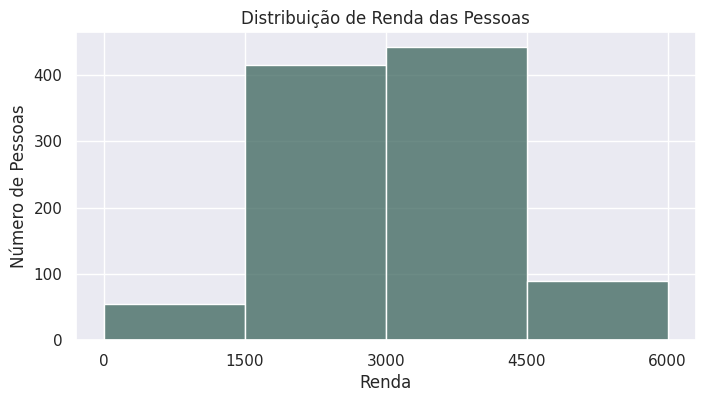

In [9]:
# Definindo as faixas salariais
faixas_salariais = [0, 1500, 3000, 4500, 6000]

# Rotulando as faixas salariais
rotulos_faixas = ["0 - 1500", "1500 - 3000", "3000 - 4500", "4500 - 6000"]

# Destacando pessoas por faixa de renda
salario = pd.cut(df["renda"], bins=faixas_salariais, labels=rotulos_faixas, right=False)

# Contando o número de pessoas em cada faixa salarial
contagem_faixas_salariais = salario.value_counts().sort_index()
print("Quantidade de pessoas por faixa de renda:")
print(f"{contagem_faixas_salariais}")

densidade_probabilidade = contagem_faixas_salariais / total_pessoas

# Impressão dos dados de densidade
print("\nDensidade de probabilidade por faixa de renda:")
for faixa, densidade in zip(rotulos_faixas, densidade_probabilidade):
    print(f"{faixa}: {densidade:.2%}")

# Configurando o estilo do seaborn
sns.set_theme()

# Plotando o histograma das faixas salariais
plt.figure(figsize=(8, 4))
sns.histplot(df["renda"], bins=faixas_salariais, kde=False, color="#3b655c")

# Definindo os rótulos dos eixos e o título do gráfico
plt.xlabel("Renda")
plt.ylabel("Número de Pessoas")
plt.title("Distribuição de Renda das Pessoas")

# Definindo os rótulos do eixo x para as faixas salariais
plt.xticks(faixas_salariais)

# Exibindo o histograma
plt.show()



##### 5. Calcule a média e a variância da renda da amostra. Depois faça a distribuição normal, inclua o gráfico.


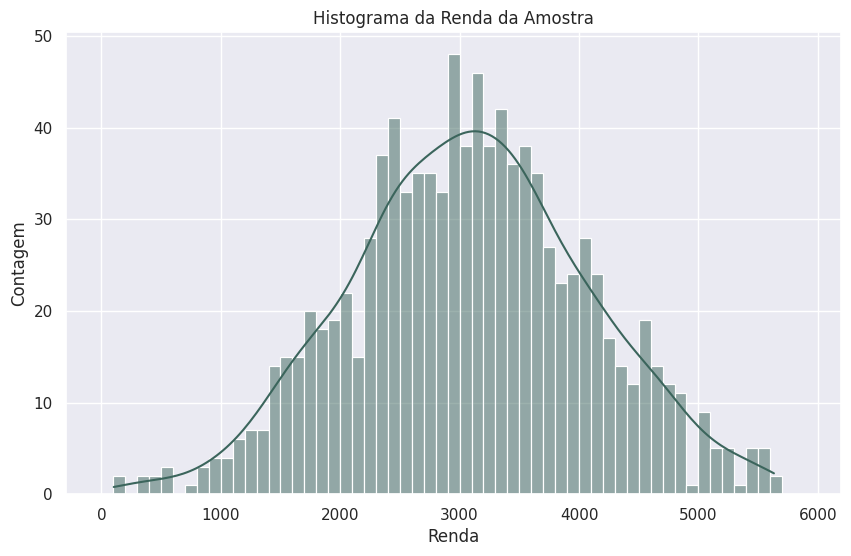


A renda média da população é 3082.54 e a variância é 993156.23


In [10]:
# Calculando a média de renda
renda_media = np.mean(df["renda"])

# Calculando a variancia
variancia_renda = df["renda"].var()

# Configurando o estilo do seaborn
sns.set_theme()

# Criando o histograma com Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='renda', bins=range(0, 6000, 100), kde=True, color="#3b655c")
plt.title("Histograma da Renda da Amostra")
plt.xlabel("Renda")
plt.ylabel("Contagem")
plt.show()

print(f"\nA renda média da população é {renda_media:.2f} e a variância é {variancia_renda:.2f}")

##### 6. Primeiro considere a probabilidade encontrada no nosso conjunto de pessoas com escolaridade de pós-graduação. Considerando a amostra de população brasileira com 1 milhão de habitantes, qual a probabilidade de encontrarmos 243 mil pessoas com pós-graduação?


In [18]:
# Filtro de pessoas com pós graduação
pessoas_pos_graduacao = len(df.loc[df["escolaridade"] == "Pós-graduação"])

# Calculando a probabilidade de pessoas com pós-graduação na amostra
prob_pessoas_pos_graduacao = pessoas_pos_graduacao / total_pessoas # Probabilidade de sucesso em uma única tentativa


tentativas = 1000000 # número de tentativas
sucessos = 243000 # probabilidade de sucessos desejados

# Cálculo de probabilidade usando a distribuição binomial - Função Massa de Probabilidade
probabilidade_1milhao = binom.pmf(sucessos, tentativas, prob_pessoas_pos_graduacao)

print(f"A probabilidade de encontrarmos {sucessos} pessoas com pós-graduação em uma amostra de {tentativas} habitantes é de aproximadamente {probabilidade_1milhao}")

A probabilidade de encontrarmos 243000 pessoas com pós-graduação em uma amostra de 1000000 habitantes é de aproximadamente 1.1104854289794913e-119


##### 7. Somando as densidades nós temos a função de densidade acumulada. Considerando a coluna ‘Escolaridade’ faça a função de densidade acumulada discreta para cada nível de escolaridade.

In [ ]:
# Calculando a frequência de cada nível de escolaridade
freq_escolaridade = df['escolaridade'].value_counts()

# Calculando a proporção de cada nível de escolaridade em relação ao total da amostra
prop_escolaridade = freq_escolaridade / len(df)

# Calculando a densidade acumulada discreta para cada nível de escolaridade
densidade_acumulada = prop_escolaridade.cumsum()

# Exibindo as densidades acumuladas para cada nível de escolaridade
print("Densidade acumulada para cada nível de escolaridade:")
print(densidade_acumulada)

Densidade acumulada para cada nível de escolaridade:
Fundamental      0.266
Pós-graduação    0.519
Superior         0.762
Médio            1.000
Name: escolaridade, dtype: float64


##### 8. Qual a margem de erro amostral da proporção populacional considerando a proporção de pessoas com nível de inglês intermediário?

In [15]:
# Filtrando pessoas com inglês intermediário
pessoas_ingles_intermediario = len(df.loc[df["nível de proficiência em inglês"] == "Intermediário"])

# Calculando a probabilidade de pessoas com inglês intermediário
prob_pessoas_ingles_intermediario = pessoas_ingles_intermediario / total_pessoas

# Calculando a probabilidade complementar
comp_pessoas_ingles_intermediario = 1 - prob_pessoas_ingles_intermediario

# Calculando a margem de erro considerando o nível de confiança de 95%
margem_erro = 1.96 * np.sqrt((prob_pessoas_ingles_intermediario * comp_pessoas_ingles_intermediario)/total_pessoas) * 100

print(f"A margem de erro amostral considerando pessoas com proeficiência intermediária em inglês é de: {margem_erro:.2f}%")

A margem de erro amostral considerando pessoas com proeficiência intermediária em inglês é de: 2.91%


##### 9. Calcula a renda da população. Qual a probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média?


In [13]:
# Calculando a probabilidade de 1 pessoa ter renda superior a média mais mil reais
prob_individual_mil = len(df[df["renda"] >= (renda_media + 1000)])

amostra_renda = 60

# Calcular a probabilidade de encontrar 60 pessoas com renda superior à média mais mil reais
probabilidade_60_pessoas = (prob_individual_mil / total_pessoas) ** amostra_renda

print(f"A probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média da população é de aproximadamente {probabilidade_60_pessoas}")


A probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média da população é de aproximadamente 2.5677489595221674e-48


##### 10. Qual a probabilidade de escolhermos alguém do Sudeste que seja homem, com ensino fundamental e com renda maior que 2 mil reais por mês?

In [ ]:
# Filtrando os eventos: 1. Ser do Sudeste 2. Homem 3. Ter ensino Fundamental 4. Renda superior a 2000
sudeste = len(df.loc[df["estado"].isin(["RJ", "SP", "MG", "ES"])])/total_pessoas

homens = len(df["sexo"] == "M")/total_pessoas

escolaridade = len(df["escolaridade"] == "Fundamental")/total_pessoas

renda = len(df["renda"] >= 2000)/total_pessoas

# Calculando a probabilidade
prob_sud_homem_fund_doimil = (sudeste * homens * escolaridade * renda) * 100

print(f"A probabilidade de escolhermos alguém do Sudeste, que seja do sexo masculino, com ensino fundamental e renda igual ou superior a 2000 é de: {prob_sud_homem_fund_doimil}%")

A probabilidade de escolhermos alguém do Sudeste, que seja do sexo masculino, com ensino fundamental e renda igual ou superior a 2000 é de: 15.7%
